In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [2]:
GOOGL = pd.read_csv('GOOGL.csv')
AMZN = pd.read_csv('AMZN.csv')
AAPL = pd.read_csv('AAPL.csv')
META = pd.read_csv('META.csv')
MSFT = pd.read_csv('MSFT.csv')

it_df = [GOOGL, AMZN, AAPL, META, MSFT]
for it in it_df:
    print(it.shape)

(100, 3)
(100, 3)
(100, 3)
(100, 3)
(100, 3)


In [3]:
CVS = pd.read_csv('CVS.csv') # CVS Health Corp.
UNH = pd.read_csv('UNH.csv') # UnitedHealth Group Inc.
MCK = pd.read_csv('MCK.csv') # McKesson Corp. 
ABC = pd.read_csv('ABC.csv')
CI = pd.read_csv('CI.csv') 

#healthcare_df = [CVS[0], UNH[0], MCK[0], ABC[0], CI[0]]

### Model 1. Linear Regression

In this model, we would use the prices of other 9 stocks to predict the closing price of the Google stock

In [4]:
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Create a Linear Regression object
linreg = LinearRegression()

In [5]:
X = pd.concat([AMZN["4. close"], AAPL["4. close"], 
               META["4. close"], MSFT["4. close"], 
               CVS["4. close"], UNH["4. close"], 
               MCK["4. close"], ABC["4. close"], 
               CI["4. close"]], axis=1)
y = GOOGL["4. close"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

linreg.fit(X_train, y_train)

print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)

Intercept 	: b =  -33.21574687141447
Coefficients 	: a =  [ 0.11502725  0.02272951 -0.34823702  6.92905869  6.66505563 -0.29052725
 -1.39186042  5.67155484 -2.53415774]


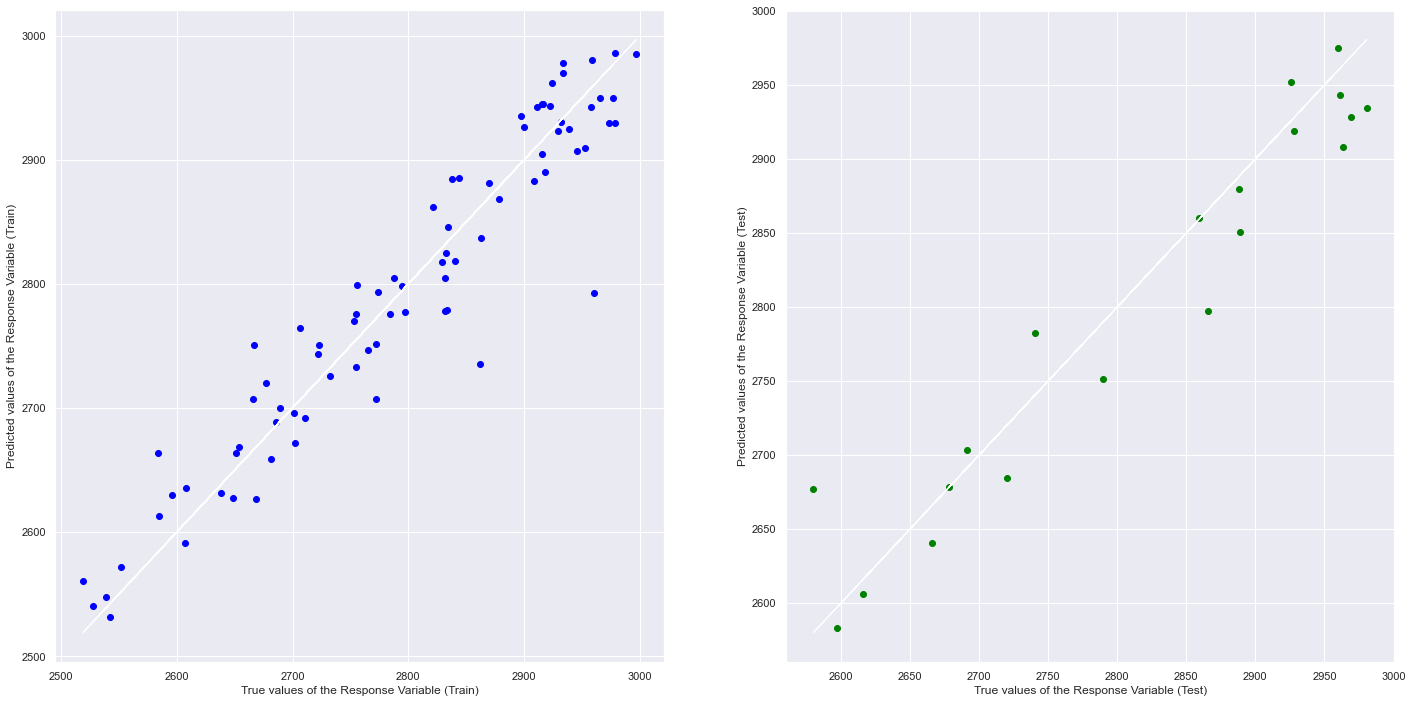

In [6]:
# Predict Response values corresponding to Predictors
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

#### Goodness of Fit of the Linear Regression model

In [7]:
# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.9129375619335969
Mean Squared Error (MSE) 	: 1500.2015421106348

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.920621095036509
Mean Squared Error (MSE) 	: 1466.9765665341042



From the Linear model above, we can see that when the true values are plotted against the predicted values, a good number of data points are near the line that represents the predicted values. As a result the Train data set had an explained variance of 0.912 and MSE of 1500.2 </p>

We also see that in the test data set the same linear model is not as close to the real data point values, and hence gives us an MSE of 1467.0, slightly lower than the training set, but the Explained Variance is still very high (0.921). </p>

From these observations, we believe that this linear model is accurate and may be valid for predicting the Google stock prices. The Explained variance is above 90% and means that the model is accurate. Although the MSE of the test data set may be high, MSE has no maximum possible value unlike Explained Variance. As such, what seems to be a large number to us may not be so for the model. 

#### Using Only the other 4 Tech Stocks

In [9]:
# Using Only the other 4 Tech Stocks
X = pd.concat([AMZN["4. close"], AAPL["4. close"], 
               META["4. close"], MSFT["4. close"]], axis=1)
y = GOOGL["4. close"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

linreg.fit(X_train, y_train)

print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)

Intercept 	: b =  473.30675594027025
Coefficients 	: a =  [ 0.14037852  0.81142684 -0.43526901  5.90434237]


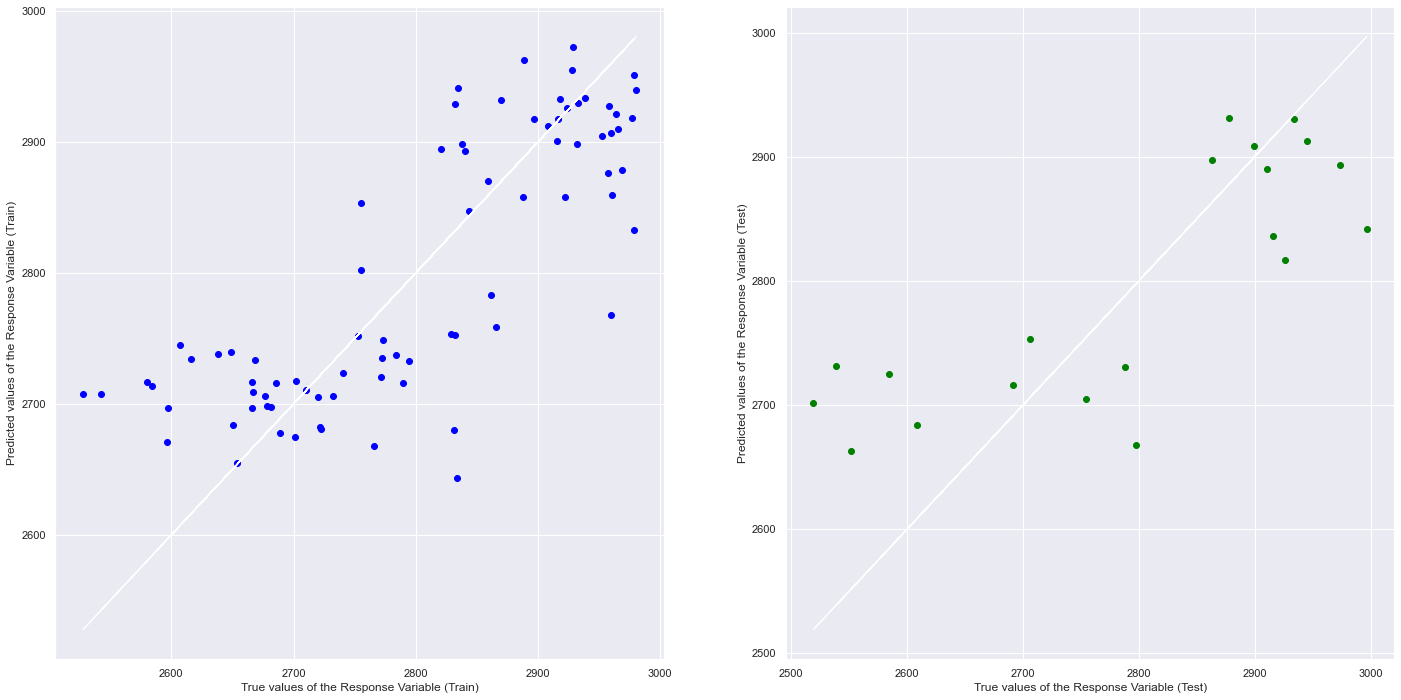

In [11]:
# Predict Response values corresponding to Predictors
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

#### Goodness of Fit of the Linear Regression model

In [12]:
# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.6392991936845984
Mean Squared Error (MSE) 	: 5729.337122623074

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.6103853023754429
Mean Squared Error (MSE) 	: 9388.183599334154



From the Linear model above, we can see that when the true values are plotted against the predicted values, a good number of data points are near the line that represents the predicted values. As a result the Train data set had an explained variance of 0.639 and MSE of 5729.3 </p>

We also see that in the test data set the same linear model is not as close to the real data point values, and hence gives us an MSE of 9388.8, almost double of the training set, and the Explained Variance is similar too (0.610). </p>

From these observations, we believe that this linear model is innacurate and is not valid for predicting the Google stock prices. The Explained variance for the test set is only 0.61 and means that the model is more inaccurate than the first model. The MSE for this model is greatly higher as well compared to the first model, especially the test set that has MSE of 9388.2, which is about six times the MSE of the first model

#### Using Only the 5 Healthcare Stocks

In [13]:
# Using Only the 5 Healthcare Stocks
X = pd.concat([CVS["4. close"], UNH["4. close"], 
               MCK["4. close"], ABC["4. close"], 
               CI["4. close"]], axis=1)
y = GOOGL["4. close"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

linreg.fit(X_train, y_train)

print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)

Intercept 	: b =  2488.9038229374282
Coefficients 	: a =  [-3.9737996   4.97658345 -6.49238789  4.72576333 -2.87148725]


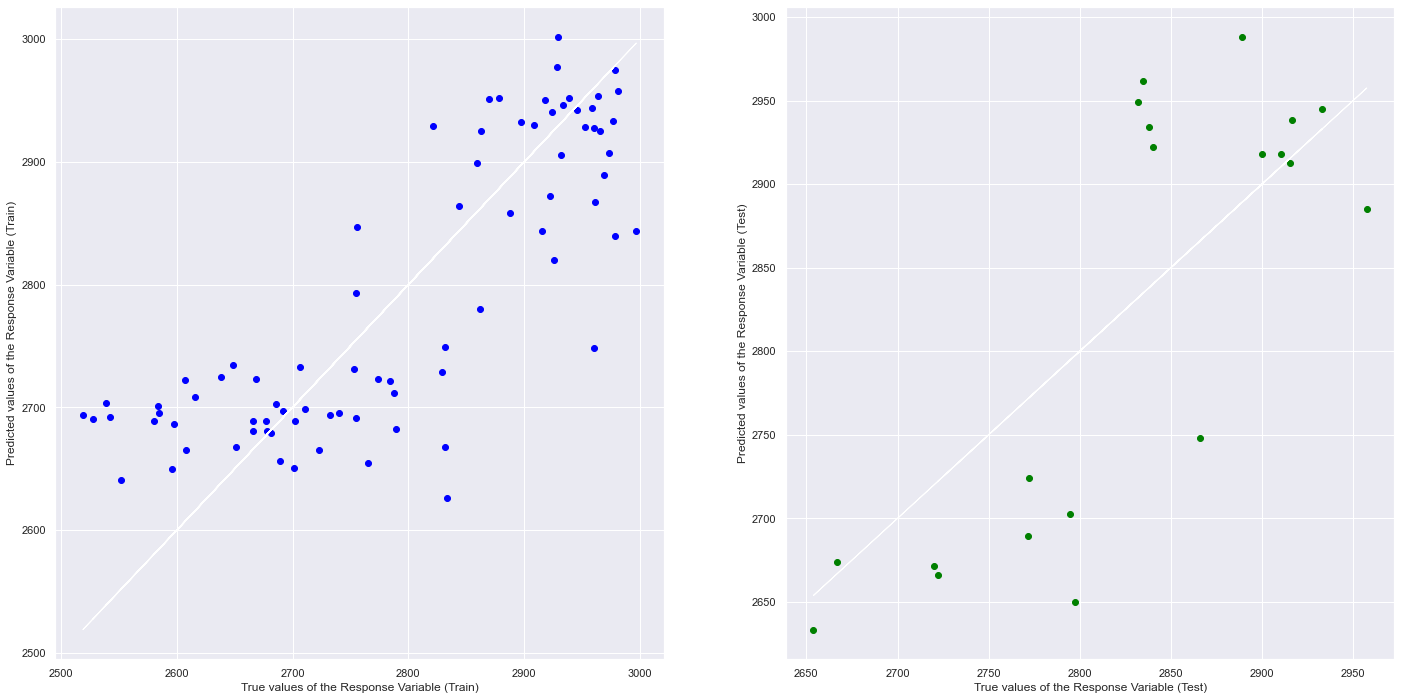

In [14]:
# Predict Response values corresponding to Predictors
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

#### Goodness of Fit of the Linear Regression model

In [15]:
# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.6611910057211741
Mean Squared Error (MSE) 	: 6714.040840464966

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.18147341756250446
Mean Squared Error (MSE) 	: 6062.5064985324225



From the Linear model above, we can see that when the true values are plotted against the predicted values, a good number of data points are near the line that represents the predicted values. As a result the Train data set had an explained variance of 0.661 and MSE of 6714.0 </p>

We also see that in the test data set the same linear model is not as close to the real data point values, and hence gives us an MSE of 6062.5, which is lower than the training set, but the Explained Variance becomes very low (0.181). </p>

From these observations, we believe that this linear model is innacurate and is not valid for predicting the Google stock prices. The Explained variance for the test set is 0.18 and means that the model is more extremely inaccurate. The MSE for this model is greatly higher as well compared to the first model, especially the test set that has MSE of 6062.5, which is about four times the MSE of the First model's test set